<a href="https://colab.research.google.com/github/otoperalias/teaching/blob/TallerUTE_AnalisisCuanti/UTE_TallerAnalisisCuanti_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/otoperalias/teaching/blob/TallerUTE_AnalisisCuanti/material/6.%20M%C3%89TODOS%20CUANTITATIVOS%20WORKSHOP%20(1).jpg?raw=true" alt="drawing" width="900"/>



## Taller de Análisis de Datos Cuantitativos

### Maestría en Urbanismo (UTE, Ecuador).

Instructor: [Daniel Oto-Peralías](https://otoperalias.github.io/)
_________________________

El objetivo del taller es aprender a explotar una encuesta o un censo a través de programas estadísticos de análisis cuantitativo.

Usaremos el [Censo de Población y Vivienda de Ecuador (2010)](https://www.ecuadorencifras.gob.ec/censo-de-poblacion-y-vivienda/) para analizar las características de las viviendas de la provincia de Loja. La tarea a realizar será la creación de un indicador de calidad de las viviendas.

**Vamos a necesitar el siguiente material:**
1. Los [datos del censo](https://www.ecuadorencifras.gob.ec/base-de-datos-censo-de-poblacion-y-vivienda/): en *A NIVEL DE SECTOR*, hacemos clic en *Censo Población y Vivienda 2010* y luego seleccionamos *Loja  (formato CSV)*.  
Nótese que al realizar la descarga, se obtiene una carpeta comprimida. Una vez descomprimida, vemos que dentro hay 4 carpetas comprimidas, una de ellas "Loja_CSV_Vivienda", que es la que vamos a utilizar. Esta última carpeta no debe descomprimirse ya que se importa directamente comprimida.
2. El [cuestionario del censo](https://www.ecuadorencifras.gob.ec//wp-content/descargas/Poblacion_y_demo/Cuestionario_censal/cuestionario_censal.pdf), donde podemos ver el significado de los códigos numéricos que aparecen en los datos.
3. El diccionario de datos del censo, para conocer el significado de cada variable. Se puede obtener a través de [este enlace](https://aplicaciones3.ecuadorencifras.gob.ec/BIINEC-war/index.xhtml?oe=CENSOS%20DE%20POBLACI%D3N%20Y%20VIVIENDA%20NACIONAL&a=2010&m=DECENAL&t=Datos%20Abiertos%20CSV), clicando en *Datos Abiertos CSV*, pero para evitaros tener que descargar dicho archivo tan pesado (~1GB), lo proporciono en [este enlace](https://github.com/otoperalias/teaching/raw/TallerUTE_AnalisisCuanti/material/Diccionario%20de%20Datos%20CPV2010.xls).
4. Además, es útil tener a mano esta publicación con una descripción de los resultados del Censo para la provincia de Loja. Disponible [aquí](https://www.ecuadorencifras.gob.ec/censo-de-poblacion-y-vivienda/), clicando en *Resultados provinciales* en *Loja*.
5. Por ultimo, descargamos las capas geográficas del *Clasificador Geográfico Estadístico*, disponible en el [portal de Geografía Estadística del INEC](https://www.ecuadorencifras.gob.ec/documentos/web-inec/Geografia_Estadistica/Micrositio_geoportal/index.html). Le damos al ratón para abajo hasta la sección **Clasificador Geográfico Estadístico**, seleccionamos "2010-CENSAL" y clicamos en el icono "zip SHP". Nótese que descargamos una carpeta comprimida con tres capas geográficas (provincias, cantones y parroquias). Debemos descomprimir este fichero.

**Sobre el programa informático:**

* En este taller usamos [**Google Colab**](https://colab.research.google.com/?hl=es), que es un *notebook* virtual desde el que podemos usar **Python**.
* La librería principal que vamos a usar es **Pandas**, una "paquete" especializado en el procesamiento y análisis de datos cuantitativos.
* La gran ventaja de Python-Pandas frente a otras alternativas (SPSS/Stata/etc.) es su carácter gratuito y la gran cantidad de recursos de ayuda que existe en Internet, debido a su enorme comunidad de usuarios.

## 1. Importamos las librerías que vamos a utilizar

Para usar el paquete de **Pandas** y poder visualizar los datos, tenemos que importar estas librerías:

In [17]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Importamos los datos


Para importar los datos, en primer lugar, tenemos que descargar los datos en nuestro ordenador y subirlos a Google Colab:
1. Clicamos en el icono de carpeta que hay en la parte superior de la barra de la izquierda (📁) y entonces clicamos en el primer icono de upload.
2. Se abre una ventana para seleccionar el archivo que queremos subir y seleccionamos la carpeta comprimida "Loja_CSV_Vivienda".

Una vez que tenemos subido el fichero y que aparece como tal ("Loja_CSV_Vivienda.zip") en la barra izquierda, podemos importarlo:

In [2]:
viv=pd.read_csv("Loja_CSV_Vivienda.zip",compression='zip')

Para visualizar la tabla, escribimos el nombre que le hemos dado

In [3]:
viv

,I01,I02,I03,I04,I05,I09,I10,URV,VTV,VAP,...,V11,V12A,V12B,V13,V14,V15,V16,TOTPER,TOTDOR,TOTEMI
0,11,1,50,1,1,1,1,1,1,3,...,1,05,00,1,3,1,1,4,1,
1,11,1,50,1,1,2,1,1,4,3,...,1,00,03,1,1,1,1,4,1,
2,11,1,50,1,1,3,1,1,6,3,...,,,,,,,,0,,
3,11,1,50,1,1,4,1,1,1,3,...,1,02,08,1,3,1,1,5,2,
4,11,1,50,1,1,5,1,1,4,3,...,,,,,,,,0,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155312,11,16,51,999,5,68,1,2,1,4,...,1,05,00,2,3,1,1,2,2,
155313,11,16,51,999,5,69,1,2,1,4,...,1,00,05,2,3,1,1,1,2,
155314,11,16,51,999,5,70,1,2,1,4,...,1,00,03,2,2,1,1,1,1,
155315,11,16,51,999,5,71,1,2,1,4,...,1,00,04,2,2,1,1,1,2,


Como se observa, esta tabla de datos (```dataframe```) tiene 155317 filas y 31 columnas. Cada fila contiene los datos censales de una vivienda.  
En los ```dataframe``` las filas se identifican con un ```index```, que generalmente es único para cada fila. Las columnas se identifican con un nombre. No debe confundirse el index de la tabla con una columna. Es decir, el index no es la primera columna.

<img src="https://github.com/otoperalias/teaching/blob/TallerUTE_AnalisisCuanti/material/df_structure.jpg?raw=true" alt="drawing" width="550"/>

## 3. Exploración inicial

Para conocer las columnas que contiene la tabla, escribimos el siguiente código:

In [4]:
viv.columns

Index(['I01', 'I02', 'I03', 'I04', 'I05', 'I09', 'I10', 'URV', 'VTV', 'VAP',
       'VCO', 'V01', 'V03', 'V05', 'V02', 'V04', 'V06', 'V07', 'V08', 'V09',
       'V10', 'V11', 'V12A', 'V12B', 'V13', 'V14', 'V15', 'V16', 'TOTPER',
       'TOTDOR', 'TOTEMI'],
      dtype='object')

Nótese que necesitamos el diccionario de datos del censo para conocer el significado de cada columna. Por otra parte, para saber el significado de los diferentes valores que toman las variables, necesitamos el cuestionario del censo. Ambos documentos se mencionan al comienzo de este notebook.

Para obtener el número de filas de la tabla (o sea, su longitud) escribimos lo siguiente:

In [5]:
len(viv)

155317

Podemos comprobar en el PDF con los resultados para Loja que en esta provincia hay 155308 viviendas. La pequeña diferencia se debe a que hay 9 cuestionarios de hogares sin viviendas (código 17 en la variable VTV).  
La función ```value_counts()``` nos da la distribución de frecuencias de una variable.

In [6]:
# Tipo de Vivienda
viv["VTV"].value_counts()

1     121940
2      12593
4       8056
3       7428
6       1680
5       1393
7       1351
8        605
9         75
10        59
14        54
13        25
16        24
11         9
17         9
15         9
12         7
Name: VTV, dtype: int64

En cuanto a terminología, las palabras *variable*, *campo* y *columna* se refieren a lo mismo. En inglés, *variable*, *field* y *column*.

Ahora creamos un gráfico similar al del PDF (página 7: *¿Qué tipo de vivienda tenemos?*):

<Axes: xlabel='VTV', ylabel='Percent'>

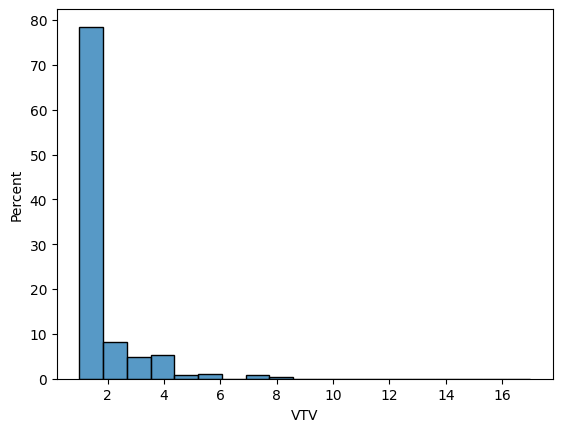

In [19]:
sns.histplot(data=viv,x="VTV",stat="percent")

El siguiente bloque de código procesa ligeramente los datos para crear un gráfico más entendible. En concreto, creamos una nueva variable en la que asignamos a cada código numérico su etiqueta.

In [20]:
# Procesamos los datos para mejorar el gráfico
viv['tipov']="" # Añadimos una nueva columna y en las líneas de código siguientes le damos contenido según los códigos de la columna VTV
viv.loc[viv['VTV']==1,'tipov']="Casa/Villa"
viv.loc[viv['VTV']==2,'tipov']="Departamento"
viv.loc[viv['VTV']==3,'tipov']="Cuarto"
viv.loc[viv['VTV']==4,'tipov']="Mediagua"
viv.loc[viv['VTV']==5,'tipov']="Rancho"
viv.loc[(viv['VTV']==6) | (viv['VTV']==7),'tipov']="Covacha/Choza"
viv.loc[(viv['VTV']==8),'tipov']="Otro"

Ahora filtramos los datos para centrarnos en las viviendas particulares (excluyendo las colectivas):

In [21]:
vivpar=viv.loc[viv['VTV']<=8].copy()

Para que las barras del gráfico salgan ordenadas según el código de la variable VTV, ordenamos la tabla por dicha variable:

In [22]:
vivpar=vivpar.sort_values("VTV")

Creamos el gráfico:

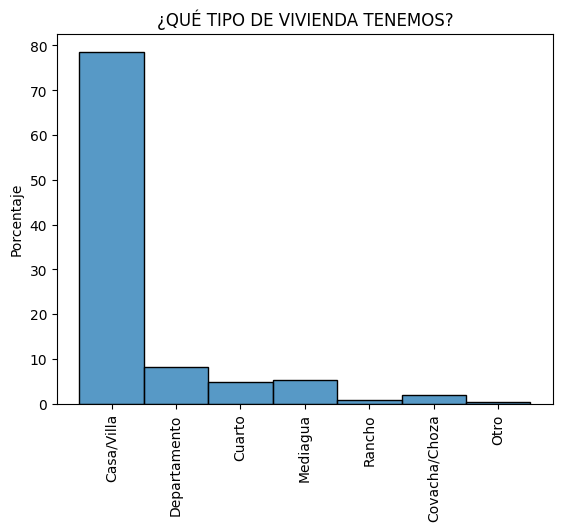

In [23]:
fig,ax=plt.subplots()  # Aquí se indica que queremos crear una figura (fig) que contiene un gráfico (ax)
sns.histplot(data=vivpar,x="tipov",stat="percent",ax=ax)  # Se indica que queremos representar un histograma, que muestre los porcentajes
ax.tick_params(axis='x', rotation=90) # Etiquetas del eje x giradas 90 grados para visualizarse mejor.
ax.set_ylabel("Porcentaje") # Título del eje y, donde se indica la unidad de medida
ax.set_xlabel("")  # No queremos título en el eje x, porque se sobre entiende.
ax.set_title("¿QUÉ TIPO DE VIVIENDA TENEMOS?")  # Título de la figura
plt.show() # Comando para que se dibuje el gráfico.

## 4. Estadística descriptiva

### 4.1. Distribución de frecuencias.  
  El gráfico anterior es un ejemplo de distribución de frecuencias, un histograma. Nos muestra como se dividen las observaciones (viviendas) por los valores o categorías de las variables.
  <br />  
Volvemos a crear un histograma, esta vez con la variable total de personas (TOTPER). Usamos la tabla ```vivpar``` y volvemos a hacer un filtro para quedarmos con aquellas viviendas particulares ocupadas con personas viviendo. A esta tabla la vamos a llamar *vpo*.

In [ ]:
vpo=vivpar.loc[vivpar['VCO']=="1"].copy()

In [ ]:
sns.histplot(data=vpo,x="TOTPER", bins=22)


### 4.2. Medidas de tendencia central.  
- La *moda* es el valor o categoría que más se repite.   
- La *mediana* es el valor central de la distribución, que la divide en dos partes iguales.  
- La *media* es el promedio.
  <br />  
  Vamos a analizar las medidas de tendencia central de la variable total de personas que residen en viviendas particulares.

In [ ]:
# Moda
vpo['TOTPER'].mode()

In [ ]:
# Mediana
vpo['TOTPER'].median()

In [ ]:
# Media
vpo['TOTPER'].mean()

### 4.3. Medidas de dispersión o variabilidad:
- Rango: valor máximo - valor mínimo.
- Varianza: promedio de las desviaciones cuadráticas respecto a la media.
- Desviación estándar: raíz cuadrada de la varianza. La desviación estándar es una medida interesante porque en una [distribución normal](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Standard_deviation_diagram_micro.svg/1920px-Standard_deviation_diagram_micro.svg.png), el 64,2% de la distribución se encuentra en torno a 1 desviación estandar de la media.

In [ ]:
print("El rango del número de personas ocupando una vivienda es: ",
      vpo['TOTPER'].max()-vpo['TOTPER'].min())

In [ ]:
print("La varianza del número de personas ocupando una vivienda es: ",
      vpo['TOTPER'].var())

In [ ]:
print("La desviación estándar del número de personas ocupando una vivienda es: ",
      vpo['TOTPER'].std())

### 4.4. Otras medidas de estadística descriptiva:
- Asimetría: en qué medida la distribución objeto de estudio se parece a una normal.
-Curtosis: elevación o achatamiento de la distribución, comparada con una normal.
-z-score: valor normalizado por la media y desviación estándar ```(x-u)/sigma```. Indica cuántas desviaciones estándar está un valor alejado de la media.


In [ ]:
# Asimetría
vpo['TOTPER'].skew() # Valor > 0: la cola de la distribución de la derecha es mayor que la de la izquierda (valor <0 sería lo contrario).

In [ ]:
# Curtosis:
vpo['TOTPER'].kurt() # Si x > 0: curtosis alta; si ~0 normal, si <0: baja. En este caso, tenemos un nivel bajo.

In [ ]:
# Z-score:
zscore=(vpo['TOTPER']-vpo['TOTPER'].mean())/vpo['TOTPER'].std()


### 4.5. Resumen de estadísticos descriptivos

Resumen de la variable TOTPER:

In [ ]:
vpo['TOTPER'].describe()

Resumen de la tabla vpo completa


In [ ]:
vpo.describe()

**Cuidado**: estos valores solo tienen sentido para las variables numéricas cardinales/ordinales, pero no para las que establecen categorías (!).  
Además, aquí podemos comprobar que algunas variables que deben ser numéricas están almacenadas como texto (y por tanto no aparecen en la tabla), por ej. el número de focos.

## 5. Agregaciones espaciales

Hasta ahora hemos estado usando datos individuales (a nivel de vivienda), pero con frecuencia nos interesa conocer los datos agregados de diferentes unidades geográficas, como la parroquia, el cantón y la provincia.  
Vamos a agrupar las filas de la tabla por cantones usando la función ```groupby()```. Para ello, tenemos que preparar las variables que nos interesan agrupar. Supongamos que queremos medir el nivel de ocupación de las viviendas (personas), el número de dormitorios y su estado de conservación. Por tanto, nos interesan las siguientes variables:  TOTPER, TOTDOR,  V02, V04 y V06.

Primero vamos a procesar la información del estado de conservación para crear variables que se puedan agregar por unidades geográficas.

In [ ]:
# Estado de conservación (1 si bueno, 0 el resto)
vpo['techo_est']=0
vpo.loc[(vpo['V02']=="1") , 'techo_est']=1

vpo['pared_est']=0
vpo.loc[(vpo['V04']=="1") , 'pared_est']=1

vpo['suelo_est']=0
vpo.loc[(vpo['V06']=="1") , 'suelo_est']=1

vpo['buen_est']=0
vpo.loc[(vpo['V02']=="1") & (vpo['V04']=="1") & (vpo['V06']=="1") , 'buen_est']=1

vpo[['techo_est','pared_est','suelo_est','buen_est']].describe()

La variable TOTPER ya la hemos explorado antes y no presenta problemas

En cuanto a la variable TOTDOR, está almacenada como texto y hay que pasarla a formato numérico.

In [ ]:
vpo['TOTDOR']=vpo['TOTDOR'].astype("int16")
vpo['TOTDOR'].describe()

Ahora ya podemos agrupar por cantones (variable I02) usando la función ```groupby()```. Antes de ello, vamos a crear una variable que toma siempre el valor 1 para contabilizar el total de viviendas en cada cantón.

In [ ]:
vpo["num"]=1

vpo_c=vpo[['I02','num','TOTPER', 'TOTDOR', 'techo_est',
           'pared_est','suelo_est','buen_est']].groupby("I02").sum()


Esta es la tabla agregada a nivel cantonal:

In [ ]:
vpo_c

Obsérvese que la función ```sum()``` tiene sentido para agregar estas variables, pero téngase en cuenta que este no siempre es el caso.  
Por otra parte, sería interesante conocer el nombre de cada cantón, no solo su código numérico. Para ello, vamos a enlazar esta tabla con otra que contiene el código y nombre de cada cantón. Está disponible [aquí](https://github.com/otoperalias/teaching/blob/TallerUTE_AnalisisCuanti/material/cantones_loja.xlsx). Tenemos que descargarlo y subirlo a Google Colab.

In [ ]:
cantones=pd.read_excel("cantones_loja.xlsx")
cantones

A la hora de enlazar dos tablas, necesitamos que tengan una columna común que permita unirlas. La tabla de cantones contiene la columna I02 con el código de cada cantón. La tabla vpo también la contiene, pero al agrupar por cantones en la tabla vpo_c, dicha columna se transformó en el index de la tabla. Así que debemos resetear el index para que I02 vuelva a ser una columna:

In [ ]:
vpo_c=vpo_c.reset_index()

In [ ]:
vpo_c=vpo_c.merge(cantones,on="I02")
vpo_c

## 6. Cálculo de tasas y otros indicadores

Podemos calcular a modo de ejemplo las siguientes tasas:
* Porcentaje de viviendas con los techos en buen estado de conservación.
* Porcentaje de viviendas con las paredes en buen estado de conservación.
* Porcentaje de viviendas con buen estado de conservación en techos, paredes y suelos.

Además, vamos a calcular la ocupación media de las viviendas en cada cantón y el número medio de dormitorios por vivienda.

In [ ]:
vpo_c['techo_est_p']=vpo_c['techo_est']/vpo_c['num']*100
vpo_c['pared_est_p']=vpo_c['pared_est']/vpo_c['num']*100
vpo_c['buen_est_p']=vpo_c['buen_est']/vpo_c['num']*100


vpo_c['totper_med']=vpo_c['TOTPER']/vpo_c['num']
vpo_c['totdor_med']=vpo_c['TOTDOR']/vpo_c['num']

Ahora podemos representar gráficamente las variables. Por ejemplo, la tasa de viviendas con buen estado total de conservación:

In [ ]:
sns.barplot(data=vpo_c, y="Cantón",x="buen_est_p", color="tab:red")


Para que las barras aparezcan ordenadas, ordenamos la tabla por la variable *buen_est_p*:

In [ ]:
vpo_c=vpo_c.sort_values("buen_est_p")
sns.barplot(data=vpo_c, y="Cantón",x="buen_est_p", color="tab:red")


Es fácil mejorar la apariencia e inteligibilidad del gráfico anterior:

In [ ]:
fig,ax=plt.subplots()
sns.barplot(data=vpo_c, y="Cantón",x="buen_est_p", color="tab:red")
ax.set_xlabel("Porcentaje de viviendas")
ax.set_ylabel("")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title("Viviendas con buen estado de conservación en techos, paredes y suelos \n")
fig.text(0,0,"Fuente: INEC. Censo 2010. Elab. propia.", size=8)
plt.show()

En cualquier caso, si os resulta al principio más fácil, podéis exportar los datos procesados y realizar el gráfico en otro programa con el que estéis más familiarizados. Para ello, usaís la función ```to_excel()``` como se muestra a continuación:

In [ ]:
vpo_c.to_excel("datos_cantones.xlsx")

El archivo se guarda junto a los otros archivos que habéis subido. Solamente hay que descargarlo.

## 7. Correlaciones

A modo de ejemplo, vamos a ver la (obvia) correlación existente entre la tasa de viviendas con techos en buen estado y la tasa de viviendas con paredes en buen estado:

In [ ]:
sns.scatterplot(data=vpo_c,x="techo_est_p",y="pared_est_p")

Ahora algo más interesante: ¿cuál es la correlación entre el número medio de personas por vivienda y el número medio de dormitorios por vivienda?

In [ ]:
sns.scatterplot(data=vpo_c,x="totper_med",y="totdor_med")

Finalmente, podemos preguntarnos si los cantones en cuyas viviendas residen de media más personas son los que tienen viviendas con mejor estado de conservación.

In [ ]:
sns.scatterplot(data=vpo_c,x="totper_med",y="buen_est_p")

Además de visualmente, las correlaciones pueden calcularse a través del coeficiente de correlación:

In [ ]:
variables_de_interes=['techo_est_p', 'pared_est_p', 'buen_est_p','totper_med', 'totdor_med']
vpo_c[variables_de_interes].corr()

## Ejercicios propuestos

**Partiendo de la tabla vpo_c:**
1. Crear un gráfico de barras donde se represente el total de personas de cada cantón. Tratad que las barras aparezcan ordenadas de menor a mayor.
2. Crear una nueva variable que sea el procentaje de viviendas con suelo en buen estado. Una vez creada, calcular la media, el valor máximo y el mínimo.

**Partiedo de la tabla vpo:**
1. Calcular el porcentaje de viviendas que eliminan principalmente la basura a través de carro recolector. Calcular tanto el porcentaje global para la provincia de Loja así como para sus 16 cantones.
2. Calcular el porcentaje de viviendas que cuentan con un medidor de energía eléctrica de uso exclusivo. Calcular tanto el porcentaje global para la provincia de Loja así como para sus 16 cantones.
3. Explorar si existe correlación, a nivel cantonal, entre las tasas creadas en el punto 1 y 2.


---

**Consejos básicos**:  
Al principio, la mejor manera de escribir código es reutilizando código ya escrito y adaptándolo a nuestras necesidades. Por ejemplo, los ejercicios propuestos se pueden realizar fácilmente usando el código que se proporciona en este notebook, simplemente introduciendo modificaciones mínimas.  
Hay que tener en cuenta que cualquier mínimo error al escribir el código, por pequeño que sea (falta un paréntesis, una letra aparece en mayúscula cuando debe estar en minúscula, falta una coma, una comilla, etc) nos va a dar error al ejecutar. Tenéis que ser muy cuidadosos y todo tiene que estar literalmente bien escrito.  Por ello, es importante reutilizar el código ya escrito y fijarse muy bien en que no falte nada.

---


## Recursos para el aprendizaje autónomo:

Existe una enorme cantidad de recursos disponibles en Internet para aprender a usar ```Pandas``` y más en general ```Python```.  
Por ejemplo, este curso aplicado a técnicas geoespaciales:
https://geo-python-site.readthedocs.io/en/latest/  

Hay también cursos gratuitos en plataformas como www.coursera.org o https://www.edx.org/

Es muy común consultar constantemente las dudas en Google. Lo más práctico es escribir la duda en inglés, ya que normalmente hay más ayuda. Suele ser de mucha utilidad las respuestas en el foro https://stackoverflow.com/
<br></br>
Y por supuesto, la ayuda oficial es también muy buen recurso:  
https://pandas.pydata.org/  
https://seaborn.pydata.org/  
https://matplotlib.org/

